# Sentiment Analysis using Support Vector Machine (SVM)

Support Vector Machine adalah algoritma machine learning yang dapat digunakan untuk menyelesaikan permasalahan klasifikasi, regresi, dan pendeteksian outlier. SVM termasuk kategori supervised learning yang merupakan salah satu metode paling populer dalam machine learning.

Tujuan algoritma SVM adalah menemukan hyperplane terbaik dalam ruang berdimensi-N (ruang dengan N-jumlah fitur) yang memisahkan titik-titik data input dengan jelas.

### Things to do:

1. Load Data
2. Analyze Data
3. Feature Engineering using TF-IDF
4. Sentiment Classification using SVM
5. Sentiment Prediction

### Import

In [1]:
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn import svm
from sklearn.metrics import classification_report

### Load Data

In [2]:
!git clone https://github.com/indobenchmark/indonlu

Cloning into 'indonlu'...
remote: Enumerating objects: 500, done.
remote: Counting objects: 100% (184/184), done.
remote: Compressing objects: 100% (74/74), done.
remote: Total 500 (delta 115), reused 139 (delta 110), pack-reused 316 (from 1)
Receiving objects: 100% (500/500), 9.45 MiB | 8.07 MiB/s, done.
Resolving deltas: 100% (235/235), done.


In [4]:
data_train = pd.read_csv('/content/indonlu/dataset/smsa_doc-sentiment-prosa/train_preprocess.tsv', sep='\t', names=["Teks", "Target"])
data_test = pd.read_csv('/content/indonlu/dataset/smsa_doc-sentiment-prosa/valid_preprocess.tsv', sep='\t', names=["Teks", "Target"])

data_train.head(5)

,Teks,Target
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral
2,lokasi strategis di jalan sumatera bandung . t...,positive
3,betapa bahagia nya diri ini saat unboxing pake...,positive
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative


### Analyze Data

In [5]:
# Melihat jumlah data pada data train dan test

print(data_train.shape)
print(data_test.shape)

(11000, 2)
(1260, 2)


In [6]:
# Menghitung jumlah data masing-masing variabel pada kolom Target

data_train['Target'].value_counts()

,count
Target,
positive,6416
negative,3436
neutral,1148


<Axes: xlabel='Target'>

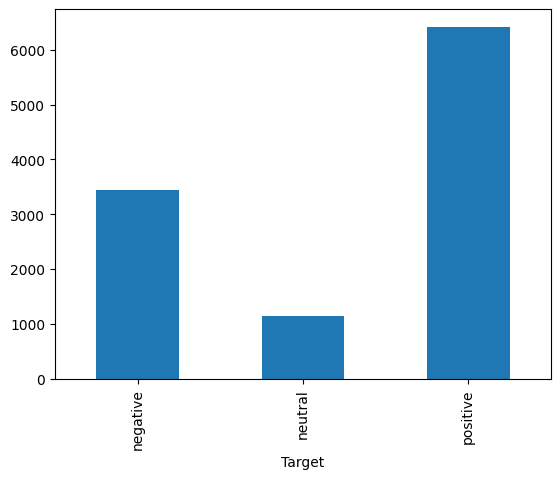

In [7]:
# Visualisasi

data_train.groupby('Target').size().plot(kind='bar')

Terlihat dari grafik kita memiliki dataset yang tidak seimbang (imbalanced dataset). Meskipun demikian, ini tidak menjadi masalah yang signifikan karena  ulasan berlabel sentimen akan dilatih satu per satu, menggunakan label sentimen masing-masing ulasan.

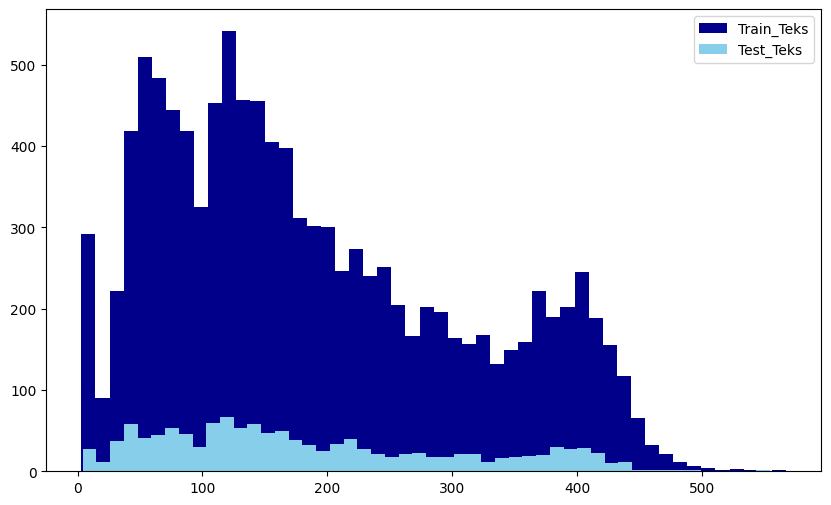

In [8]:
# Melihat panjang teks dalam data train dan data test

length_train = data_train['Teks'].str.len()
length_test = data_test['Teks'].str.len()
plt.figure(figsize=(10,6))
plt.hist(length_train, bins=50, label="Train_Teks", color = "darkblue")
plt.hist(length_test, bins=50, label='Test_Teks', color = "skyblue")
plt.legend()

In [9]:
# Sentimen yang ada pada seluruh data train dapat dilihat dengan memahami kata yang umum dengan plot word cloud

def wordCloud(words):
    wordCloud = WordCloud(width=800, height=500, background_color='white', random_state=21, max_font_size=120).generate(words)

    plt.figure(figsize=(10, 7))
    plt.imshow(wordCloud, interpolation='bilinear')
    plt.axis('off')

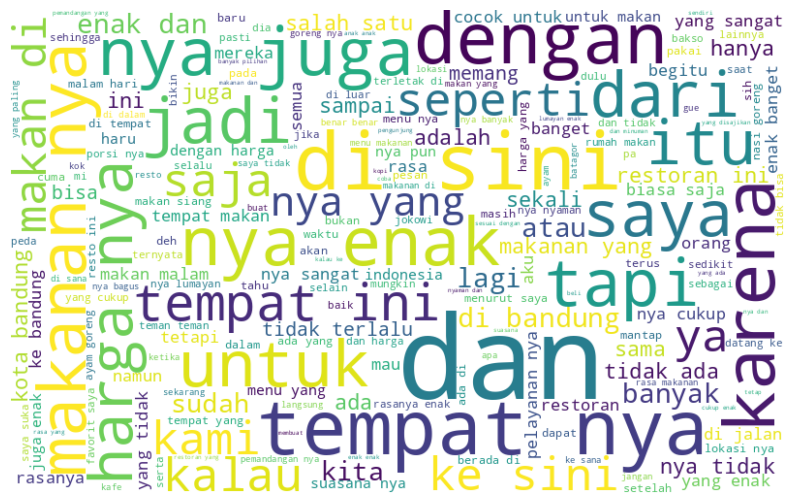

In [10]:
all_words = ' '.join([text for text in data_train['Teks']])
wordCloud(all_words)

### Feature Engineering using TF-IDF

Fungsi tfidfvectorizer memiliki beberapa parameter, antara lain:

- `min_df`

  Digunakan untuk menghilangkan term/istilah yang terlalu jarang muncul. Sebagai contoh, jika diset min_df = 0.01, artinya kita mengabaikan term yang muncul kurang dari 1% dalam teks. Jika diset min_df = 5, artinya kita mengabaikan term yang muncul dalam kurang dari 5 dokumen.

- `max_df`
  
  Digunakan untuk menghilangkan term yang terlalu sering muncul, biasanya merupakan stop words yang telah kita bahas pada materi sebelumnya. Sebagai contoh, jika diset max_df=0.8, artinya kita mengabaikan term yang muncul lebih dari 80% dalam teks. Jika diset 25, artinya kita mengabaikan term yang muncul di lebih dari 25 dokumen.

- `sublinear_tf`

  Berfungsi untuk melakukan scaling dan bernilai boolean dengan default false. Sublinear_tf=True akan mengubah vektor frekuensi menjadi bentuk logaritmik (1+log(tf)). Sehingga dapat menormalisasi bias terhadap teks yang panjang dan teks yang pendek.

- `use_idf`

  Bernilai boolean dengan default True. Parameter ini memungkinkan kita untuk menggunakan Inverse Document Frequency (IDF). Hal ini berarti term yang terlalu sering muncul dalam teks akan diberi skor lebih sedikit dibanding term yang jarang muncul (hanya muncul pada teks yang spesifik saja).

Dalam proses vektorisasi ini, digunakan dua metode yaitu:

- `fit_transform`

  Metode ini mempelajari kosa kata dan Inverse Document Frequency (IDF) yang telah kita bahas sebelumnya. Ia memberikan nilai return berupa document-term matrix.

- `transform`

  Metode ini mentransformasi dokumen ke dalam document-term matrix.

In [11]:
# Melakukan vektorisasi untuk mengekstrak fitur dengan TF-IDF
vectorizer = TfidfVectorizer(min_df = 5,
                             max_df = 0.8,
                             sublinear_tf = True,
                             use_idf = True)

train_vectors = vectorizer.fit_transform(data_train['Teks'])
test_vectors = vectorizer.transform(data_test['Teks'])